In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import tensorflow_addons as tfa
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [160]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [161]:
# Output to csv file
import csv
path_csv = './'
file_names = ['/t20_tx10.csv', '/t8_tx10.csv', '/t8_tx15.csv']

# Read csv
rssi_data = []
snr_data = []
for name in file_names:
  with open(path_csv + name, 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    current_file_rssi = []
    current_file_snr = []
    for row in reader:
      current_file_rssi.append(float(row['rssi']))
      current_file_snr.append(float(row['snr']))
    rssi_data.append(current_file_rssi)
    snr_data.append(current_file_snr)

distance = np.arange(0, len(rssi_data[0])*3, 3)


In [162]:
distance

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201])

In [163]:
tx15 =  [15 for i in range(len(rssi_data[0]))]
tx10 =  [10 for i in range(len(rssi_data[0]))]

In [164]:
tx_15_8 = pd.DataFrame(list(zip(rssi_data[2], snr_data[2], tx15, distance)), columns=['rssi', 'snr', 'tx_power','distance'])
tx_10_8 = pd.DataFrame(list(zip(rssi_data[1], snr_data[1],  tx10, distance)), columns=['rssi', 'snr', 'tx_power','distance'])
tx_10 = pd.DataFrame(list(zip(rssi_data[0], snr_data[0],  tx10, distance)), columns=['rssi', 'snr', 'tx_power','distance'])
frames = [tx_15_8, tx_10_8, tx_10]
df = pd.concat(frames, ignore_index=True)
df

,rssi,snr,tx_power,distance
0,-34.666667,13.400000,15,0
1,-28.000000,12.066667,15,3
2,-54.333333,11.166667,15,6
3,-58.333333,12.166667,15,9
4,-67.333333,12.600000,15,12
...,...,...,...,...
191,-95.333333,6.466667,10,189
192,-106.333333,-7.533333,10,192
193,-104.333333,-8.200000,10,195
194,-102.666667,-4.866667,10,198


In [165]:
X = df.iloc[:,:3]
y = df.iloc[:,3:] 

In [166]:
reg = LinearRegression().fit(X, y)

In [167]:
reg.score(X, y)

0.520085161387698

In [168]:
train_dataset = df.sample(frac=0.8, random_state=91720)
test_dataset = df.drop(train_dataset.index)

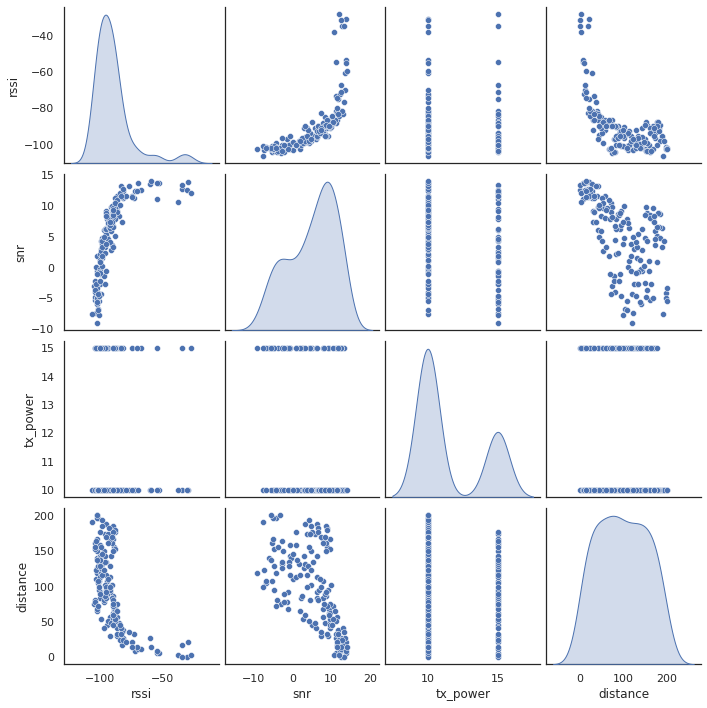

In [169]:
sns.pairplot(train_dataset[['rssi', 'snr', 'tx_power','distance']], diag_kind='kde')

<AxesSubplot:>

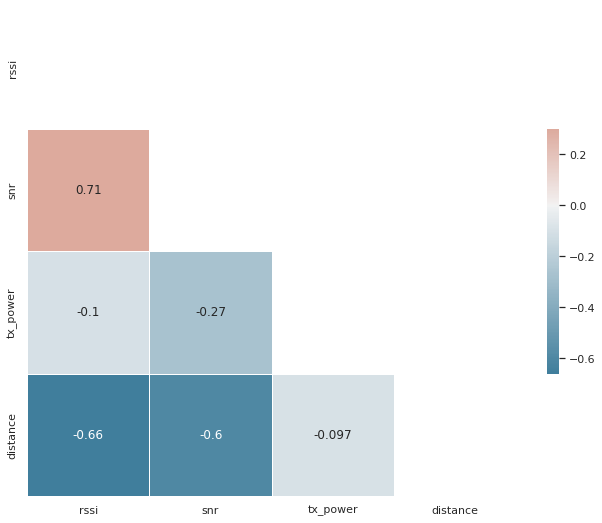

In [170]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [171]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rssi,157.0,-89.821656,15.281757,-106.333333,-99.666667,-93.333333,-87.666667,-28.0
snr,157.0,5.026539,6.086328,-9.000000,0.066667,6.400000,9.733333,14.0
tx_power,157.0,11.528662,2.310956,10.000000,10.000000,10.000000,15.000000,15.0
distance,157.0,97.796178,56.889427,0.000000,51.000000,96.000000,144.000000,201.0


In [172]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('distance')
test_labels = test_features.pop('distance')

In [173]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
rssi,-89.821656,15.281757
snr,5.026539,6.086328
tx_power,11.528662,2.310956
distance,97.796178,56.889427


In [174]:
!pip install -U tensorboard_plugin_profile

2023-04-17 14:20:45.897004: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-04-17 14:20:45.897024: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-04-17 14:20:45.897039: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2023-04-17 14:20:45.897043: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2023-04-17 14:20:45.897045: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2023-04-17 14:20:45.897048: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1730] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2023-04-17 14:20:45.897109: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session te

2/2 [==============================] - 0s 1ms/step


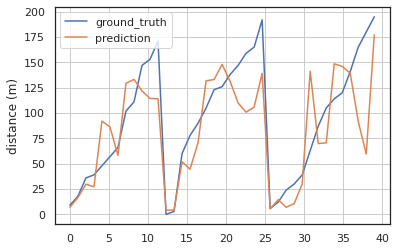

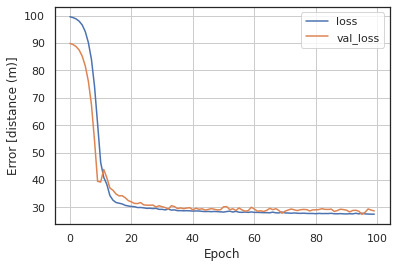

In [175]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [distance (m)]')
  plt.legend()
  plt.grid(True)
  plt.show()
  

def plot_versus(predictions):
  plt.plot(np.linspace(0, len(test_labels), len(test_labels)), test_labels, label = "ground_truth")
  plt.plot(np.linspace(0, len(predictions), len(predictions)), predictions, label = "prediction")
  plt.ylabel("distance (m)")
  plt.legend()
  plt.grid(True)
  plt.show()


def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1, activation='linear')
  ])
  return model

  
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')


model = build_and_compile_model(normalizer)
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])
history=model.fit(train_features,train_labels, epochs=100, batch_size=16, verbose=0, validation_split=0.2, callbacks = [tboard_callback])
predictions = model.predict(test_features)

plot_versus(predictions)
plot_loss(history)

In [176]:
%load_ext tensorboard
%tensorboard --logdir=logs

In [177]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(test_labels, pd.Series([i[0] for i in predictions]))
result = metric.result()
result.numpy()

0.5962383

In [178]:
result = pd.DataFrame(list(zip(test_labels, predictions, [x - y for x, y in zip(test_labels, predictions)])), columns=['control', 'pred', 'diff'])
result

,control,pred,diff
0,9,[7.030086],[1.969914]
1,18,[16.65392],[1.3460808]
2,36,[29.856182],[6.143818]
3,39,[27.221132],[11.778868]
4,48,[92.046715],[-44.046715]
5,57,[86.32453],[-29.324532]
6,66,[58.197887],[7.8021126]
7,102,[129.35574],[-27.355743]
8,111,[133.17929],[-22.17929]
9,147,[121.81072],[25.189278]


In [179]:
# model.save('rssi_to_distance')

In [180]:
model.predict(test_features.iloc[0:1,:])

1/1 [==============================] - 0s 10ms/step


array([[7.03]], dtype=float32)

In [181]:
a = test_features.iloc[0,1:]

In [182]:
reloaded = tf.keras.models.load_model('rssi_to_distance')
data = {'rssi': -58.333333333333336, 'snr': 12.166666666666666, 'tx_power': 15.0}
data = pd.DataFrame(data, index=[0])
reloaded.predict(data)

1/1 [==============================] - 0s 34ms/step


array([[6.588]], dtype=float32)